In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import seaborn as sns

# LOADING DATASET

In [32]:
df=pd.read_csv('dataset.csv')

In [50]:
df=df.drop('0',axis=1)
df

KeyError: "['0'] not found in axis"

In [52]:
Labels=df['ka'].values
unique_val = np.array(Labels)
np.unique(unique_val)
df=df.drop('ka',axis=1)

In [46]:
for i in range(Labels.size):
    if(type(Labels[i]) is int):
        Labels[i]=str(Labels[i])
Labels

array(['ka', 'ka', 'ka', ..., '9', '9', '9'], dtype=object)

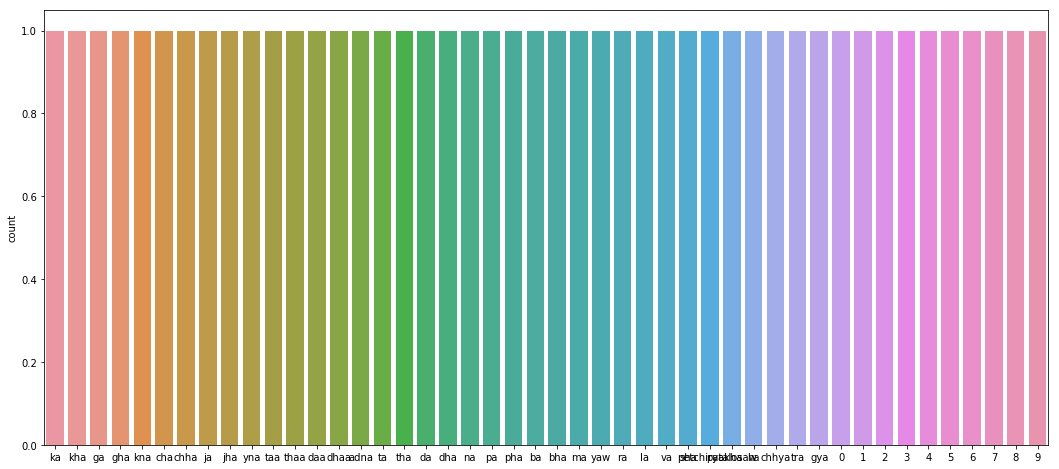

In [25]:
plt.figure(figsize=(18,8))
sns.countplot(x=Labels)

In [48]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(Labels)

In [53]:
images = df.values
images = np.array([np.reshape(i, (32,32)) for i in images])
images = np.array([i.flatten() for i in images])

In [55]:
images.shape
labels.shape

(91999, 46)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size = 0.15, random_state = 101)

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [58]:
batch_size = 128
num_classes = 46
epochs = 20

In [59]:
x_train = x_train / 255
x_test = x_test / 255

In [60]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

In [61]:
model = Sequential()
model.add(Conv2D(64,strides=(1,1),kernel_size=(5,5),input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [62]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [63]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Train on 78199 samples, validate on 13800 samples
Epoch 1/20
78199/78199 [==============================] - 175s 2ms/step - loss: 0.9209 - acc: 0.7436 - val_loss: 0.2521 - val_acc: 0.9297
Epoch 2/20
78199/78199 [==============================] - 173s 2ms/step - loss: 0.2689 - acc: 0.9173 - val_loss: 0.1541 - val_acc: 0.9551
Epoch 3/20
78199/78199 [==============================] - 174s 2ms/step - loss: 0.1789 - acc: 0.9452 - val_loss: 0.1236 - val_acc: 0.9638
Epoch 4/20
78199/78199 [==============================] - 174s 2ms/step - loss: 0.1309 - acc: 0.9591 - val_loss: 0.1055 - val_acc: 0.9687
Epoch 5/20
78199/78199 [==============================] - 174s 2ms/step - loss: 0.1080 - acc: 0.9658 - val_loss: 0.0968 - val_acc: 0.9693
Epoch 6/20
78199/78199 [==============================] - 172s 2ms/step - loss: 0.0891 - acc: 0.9713 - val_loss: 0.0903 - val_acc: 0.9724
Epoch 7/20
78199/78199 [==============================] - 172s 2ms/step - 

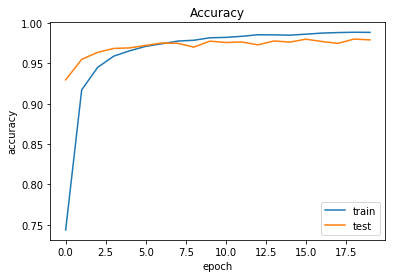

In [64]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

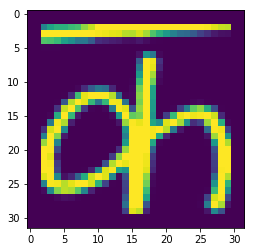

In [81]:
img=cv2.imread('example.png',0)
imgplot=plt.imshow(img)

In [82]:
hindi_letters=['ka','kha','ga','gha','kna','cha','chha','ja','jha','yna','taa','thaa','daa','dhaa','adna','ta','tha','da','dha','na','pa','pha','ba','bha','ma','yaw','ra','la','va','sha','petchiryakha','patalosaw','ha','chhya','tra','gya','0','1','2','3','4','5','6','7','8','9']
ans=model.predict(img.reshape(1,32,32,1))
print(hindi_letters[np.argmax(ans)])

yaw
